In [2]:
import numpy as np
from matplotlib import cm, pyplot as plt
from scipy.misc import imread, imsave
from numpy.random import randint

# Problem 1

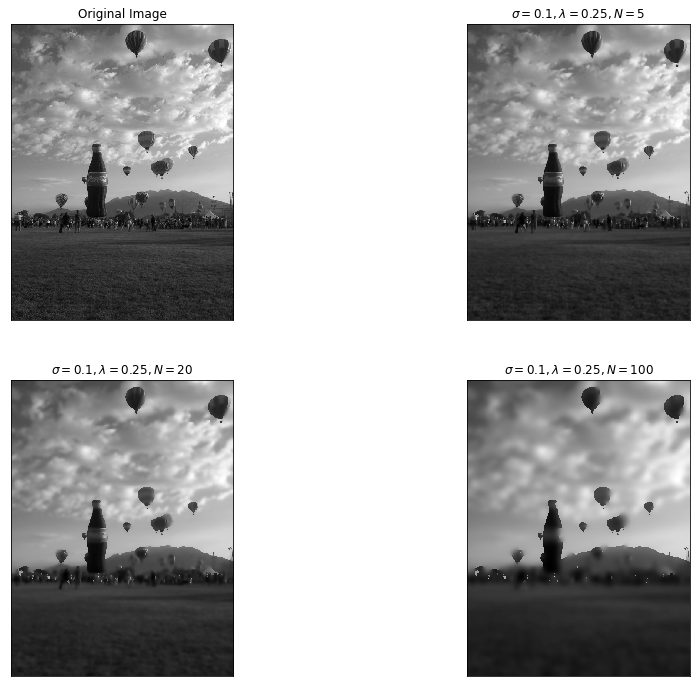

In [26]:
# n is time, l is x-axis, m is y-axis
def anisdiff_bw(U, N, lmbda, g):
    U0 = U
    U0 = np.vstack((U[0],U,U[-1]))
    shape = U0[:,0].shape[0]
    U0 = np.hstack((U0[:,0].reshape((shape,1)),U0,U0[:,-1].reshape((shape,1))))
    for n in range(N):
        U1 = np.zeros_like(U0)
        # filter matrix
        U1[1:-1, 1:-1] = U0[1:-1, 1:-1] \
            + lmda*(g(U0[1:-1, :-2] - U0[1:-1, 1:-1]) * (U0[1:-1,  :-2] - U0[1:-1, 1:-1])) \
            + lmda*(g(U0[1:-1,2:]   - U0[1:-1, 1:-1]) * (U0[1:-1, 2:]   - U0[1:-1, 1:-1])) \
            + lmda*(g(U0[ :-2,1:-1] - U0[1:-1, 1:-1]) * (U0[ :-2, 1:-1] - U0[1:-1, 1:-1])) \
            + lmda*(g(U0[2:  ,1:-1] - U0[1:-1, 1:-1]) * (U0[2:  , 1:-1] - U0[1:-1, 1:-1]))
        
        U0 = U1[1:-1,1:-1]
        U0 = np.vstack((U0[0],U0,U0[-1]))
        U0 = np.hstack((U0[:,0].reshape((shape,1)),U0,U0[:,-1].reshape((shape,1))))

    return U0

picture = imread('balloon.jpg', flatten=True) / 255.
plt.figure(figsize = (15,12))
plt.subplot(2,2,1)
plt.imshow(picture, cmap = cm.gray)
plt.rc('text', usetex=True)
plt.title("Original Image")
plt.rc('text', usetex=False)
plt.xticks([])
plt.yticks([])
# plt.tight_layout()
sigma = .1
lmda = .25
g = lambda x: np.exp(-(x/sigma)**2)
i = 2
for N in [5,20,100]:
    plt.subplot(2,2,i)
    plt.imshow(anisdiff_bw(picture, N, lmda, g), cmap = cm.gray)
    plt.xticks([])
    plt.yticks([])
    plt.rc('text', usetex=True)
    plt.title('$\sigma={}, \lambda={}, N={}$'.format(sigma,lmda,N))
    plt.rc('text', usetex=False)
    i += 1
plt.show()

# Problem 2

In [7]:
# n is time, l is x-axis, m is y-axis
def anisdiff_color(U, N, lmbda, g):
    U0 = U
    U0 = np.concatenate((U[:,0].reshape((U.shape[1],1,3)),U,U[:,-1].reshape((U.shape[1],1,3))), axis=1)
    shape = U0[:,0].shape[0]
    U0 = np.hstack((U0[:,:,0].reshape((shape,1,3)),U0,U0[:,:,-1].reshape((shape,1,3))))
    for n in range(N):
        U1 = np.zeros_like(U0)
        # filter matrix
        center = U0[:,1:-1, 1:-1]
        left = U0[:,1:-1, :-2]
        right = U0[:,1:-1,2:]
        up = U0[:, :-2,1:-1]
        down = U0[:, 2:  ,1:-1]
        U1[:, 1:-1, 1:-1] = center \
            + lmda*(g(left  - center) * (left  - center)) \
            + lmda*(g(right - center) * (right - center)) \
            + lmda*(g(up    - center) * (up    - center)) \
            + lmda*(g(down  - center) * (down  - center))
        
        U0 = U1[:,1:-1,1:-1]
        U0 = np.vstack((U0[:,0],U0,U0[:,-1]))
        U0 = np.hstack((U0[:,:,0].reshape((3,shape,1)),U0,U0[:,:,-1].reshape((3,shape,1))))

    return U0

picture = imread('balloon.jpg', flatten=False) / 255.
plt.figure(figsize = (15,12))
plt.subplot(2,2,1)
plt.imshow(picture)
plt.rc('text', usetex=True)
plt.title("Original Image")
plt.rc('text', usetex=False)
plt.xticks([])
plt.yticks([])
# plt.tight_layout()
sigma = .1
lmda = .25
g = lambda x: np.exp(-(x/sigma)**2)
i = 2
for N in [5,20,100]:
    plt.subplot(2,2,i)
    plt.imshow(anisdiff_color(picture, N, lmda, g))
    plt.xticks([])
    plt.yticks([])
    plt.rc('text', usetex=True)
    plt.title('$\sigma={}, \lambda={}, N={}$'.format(sigma,lmda,N))
    plt.rc('text', usetex=False)
    i += 1
plt.show()

ValueError: cannot reshape array of size 2400 into shape (600,1,3)

In [6]:
picture = imread('balloon.jpg', flatten=False) / 255.
picture.shape

(800, 600, 3)